In [6]:
from google.colab import drive

In [7]:
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [9]:
import cv2 # importndo open cv
import numpy as np #importando numpy (para definir matrices y poderlas procesar)


In [10]:
from google.colab.patches import cv2_imshow

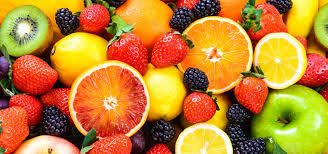

In [ ]:
#importar un imgen 
img = cv2.imread("/gdrive/My Drive/Colab Notebooks/frutas.jpg")
cv2_imshow(img)

In [ ]:
type(img) #preguntndo por el tipo de variable

numpy.ndarray

In [ ]:
print(img.shape)

(154, 328, 3)


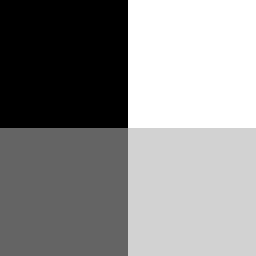

In [ ]:
#crear imagen simple
img_prueba = np.ones((256,256),np.uint8)
c_negro = np.zeros((128,128),np.uint8)
c_blanco = 255*np.ones((128,128),np.uint8)
c_gris1 = 100*np.ones((128,128),np.uint8)
c_gris2 = 210*np.ones((128,128),np.uint8)

img_prueba[0:128,0:128] = c_negro
img_prueba[0:128,128:256] = c_blanco
img_prueba[128:256,0:128] = c_gris1
img_prueba[128:256,128:256] = c_gris2

cv2_imshow(img_prueba)

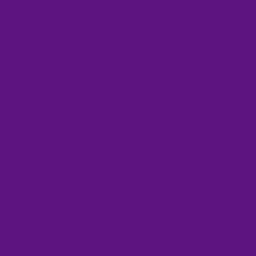

In [ ]:
# estudiar los colores
img_color = np.zeros((256,256,3),np.uint8)
img_color[:,:,0]= 128*np.ones((256,256),np.uint8) # capa azul
img_color[:,:,2]= 93*np.ones((256,256),np.uint8)#cap roja
img_color[:,:,1]= 20*np.ones((256,256),np.uint8) #capa verde, estas son los 3 colores en los canales 0,2  1, de ahí se generan los demás.
cv2_imshow(img_color)

Threshold 1


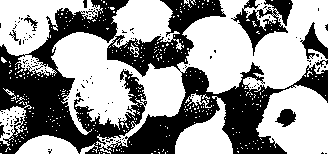

Threshold 2


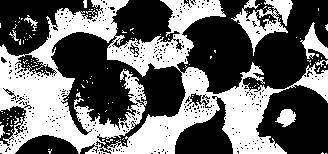

In [ ]:
#trehsolding
img = cv2.imread("/gdrive/My Drive/Colab Notebooks/frutas.jpg")
img_gris = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,th1 = cv2.threshold(img_gris,130,255,cv2.THRESH_BINARY)
_,th2 = cv2.threshold(img_gris,130,255,cv2.THRESH_BINARY_INV)
print("Threshold 1")
cv2_imshow(th1)
print("Threshold 2")
cv2_imshow(th2)



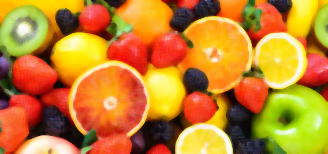

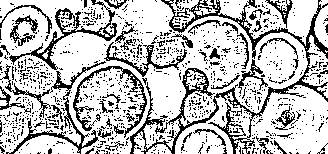

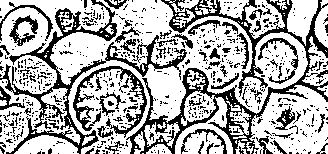

In [ ]:
# Threshold adaptativo 
img = cv2.imread("/gdrive/My Drive/Colab Notebooks/frutas.jpg")
img = cv2.medianBlur(img,5)
img_gris= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th2 = cv2.adaptiveThreshold(img_gris,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
th3 = cv2.adaptiveThreshold(img_gris,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,2)
cv2_imshow(img)
cv2_imshow(th2)
cv2_imshow(th3)


Imagen Original


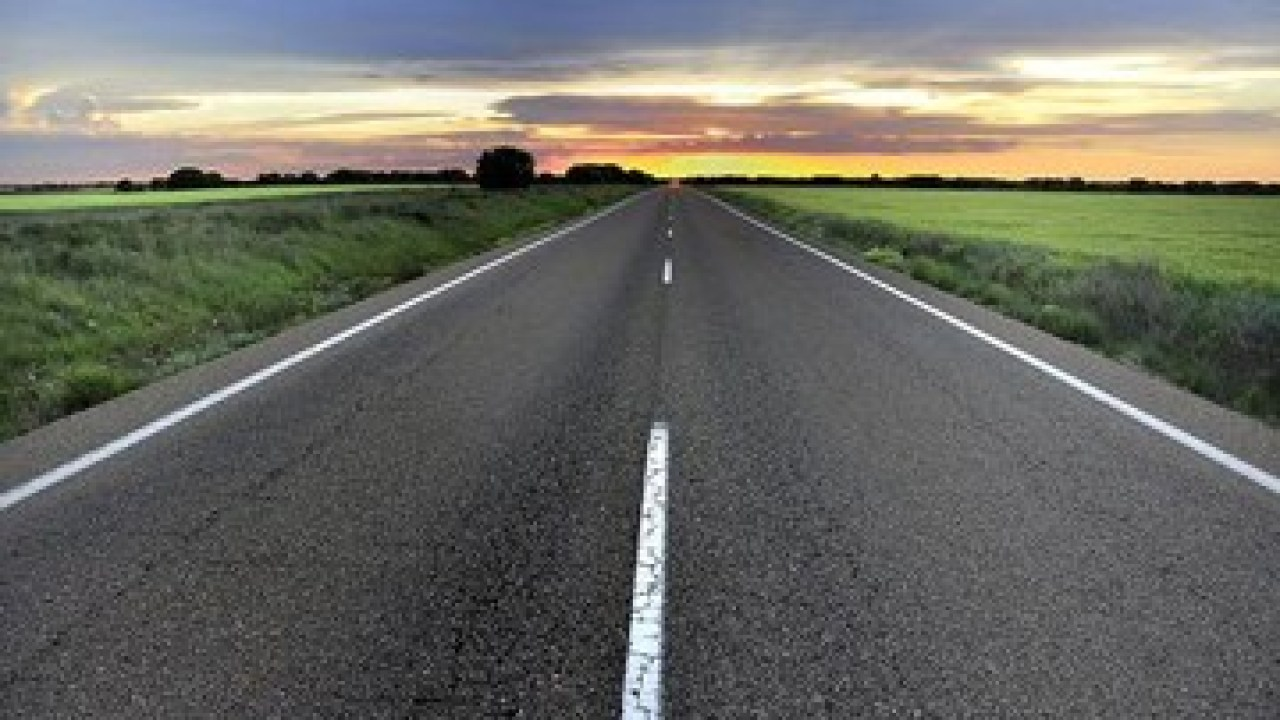

In [11]:
# detección de ejes
img = cv2.imread("/gdrive/My Drive/Colab Notebooks/carretera.jpg")
img_gris = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ejes_detectados = cv2.Canny(img_gris,100,200)
print("Imagen Original")
cv2_imshow(img)

In [17]:
#pintar contornos
img_org = cv2.imread("/gdrive/My Drive/Colab Notebooks/carretera.jpg")
img_gris = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,th=cv2.threshold(img_gris,130,255,0)
contornos,_ =cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Cantidad de contornos encontrados: ", len(contornos))
print(contornos[0])
cv2.drawContours(img,contornos,-1,(0,255,0),3)#(rojo, verd y azul)
print("Imagen Original")
cv2_imshow(img_org)
cv2_imshow(img_gris)
cv2_imshow(th)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

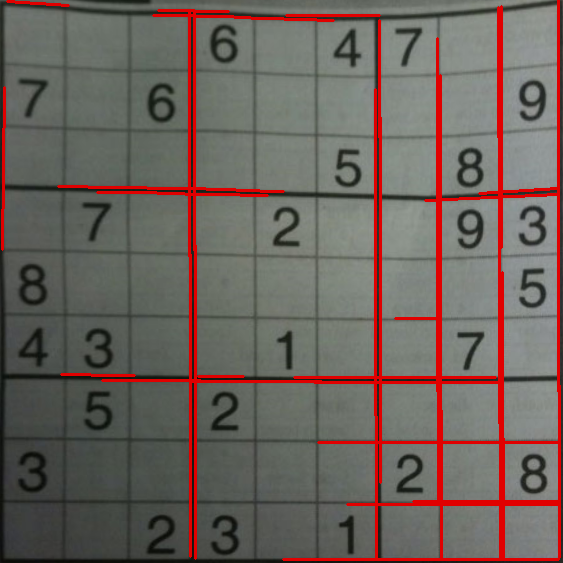

In [31]:
#detectar linea, no contornos.
img = cv2.imread("/gdrive/My Drive/Colab Notebooks/sudoku.png")
img_grises = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ejes_detectados = cv2.Canny(img_grises, 100,150)
lineas = cv2.HoughLinesP(ejes_detectados,1,np.pi/180,100,minLineLength=20,maxLineGap=10) #detectar 4 puntos por cada linea detectada, los cuales definen donde empieza y termina

for linea in lineas:
  x1,y1,x2,y2 = linea[0]
  cv2.line(img,(x1,y1),(x2,y2),(0,0,225),2)#pintar la linea
cv2_imshow(img)